In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import random

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
len(df)

42000

In [7]:
X = df.drop(labels="label", axis=1)
y = df["label"]

In [8]:
X_3d = X.to_numpy().reshape(len(X), 28, 28) 

In [9]:
random.randrange(0, len(df))

24636

In [10]:
def show_image(index=None):
    if index == None:
        index = random.randrange(0, len(df))
    plt.imshow(X_3d[index], interpolation="nearest")
    plt.gray()

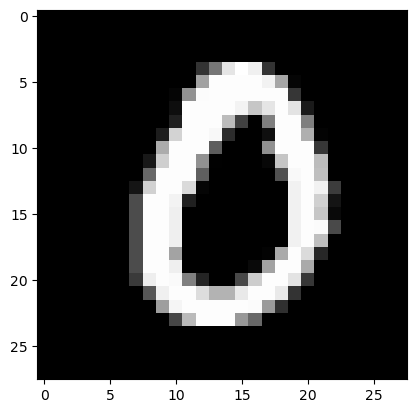

In [11]:
show_image()

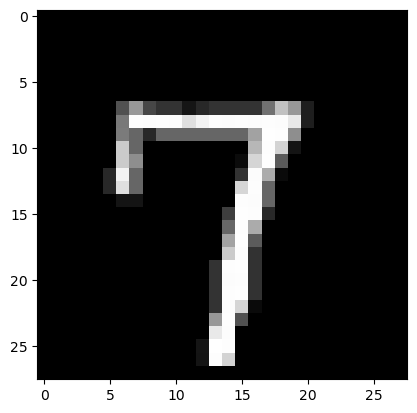

In [12]:
show_image(6)

In [13]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [15]:
X_train.shape

(33600, 784)

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics="accuracy")

history = model.fit(X_train, y_train, epochs=8, 
                    validation_data=(X_test, y_test))

Epoch 1/8
1050/1050 [==============================] - 8s 4ms/step - loss: 0.2584 - accuracy: 0.9229 - val_loss: 0.1293 - val_accuracy: 0.9613
Epoch 2/8
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1038 - accuracy: 0.9675 - val_loss: 0.1284 - val_accuracy: 0.9644
Epoch 3/8
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0688 - accuracy: 0.9783 - val_loss: 0.1119 - val_accuracy: 0.9656
Epoch 4/8
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0500 - accuracy: 0.9832 - val_loss: 0.1002 - val_accuracy: 0.9699
Epoch 5/8
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.1079 - val_accuracy: 0.9711
Epoch 6/8
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0307 - accuracy: 0.9898 - val_loss: 0.1136 - val_accuracy: 0.9705
Epoch 7/8
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.1122 - val_accuracy: 0.9740

Text(0, 0.5, 'Loss')

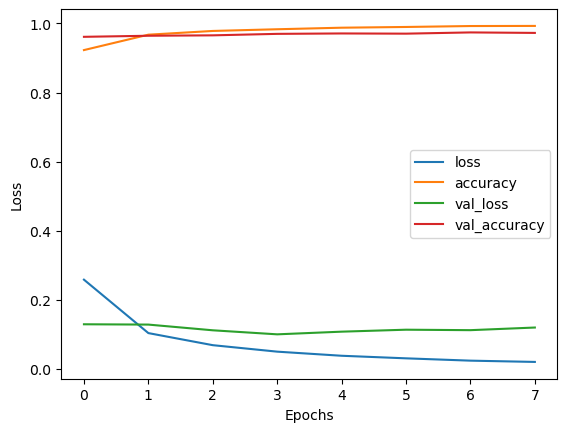

In [17]:
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [18]:
y_pred = np.argmax(model.predict(X_test), axis=1)

263/263 [==============================] - 0s 2ms/step


In [19]:
y_pred

array([1, 8, 6, ..., 7, 7, 1])

In [20]:
data = {
    "Y Test": y_test,
    "Y Predict": y_pred,
    "df_index": y_test.index
}
result = pd.DataFrame(data)

In [21]:
mis_match = result[result["Y Test"] != result["Y Predict"]]

In [22]:
mis_match.reset_index(drop=True, inplace=True)

In [23]:
mis_match

,Y Test,Y Predict,df_index
0,3,5,15536
1,7,3,679
2,9,3,36374
3,6,5,2153
4,8,6,377
...,...,...,...
225,4,1,34767
226,8,1,39990
227,3,9,22554
228,6,1,27552


In [24]:
mis_match_index = mis_match["df_index"]

In [25]:
height = int(len(mis_match_index)/8) + 1 
height

29

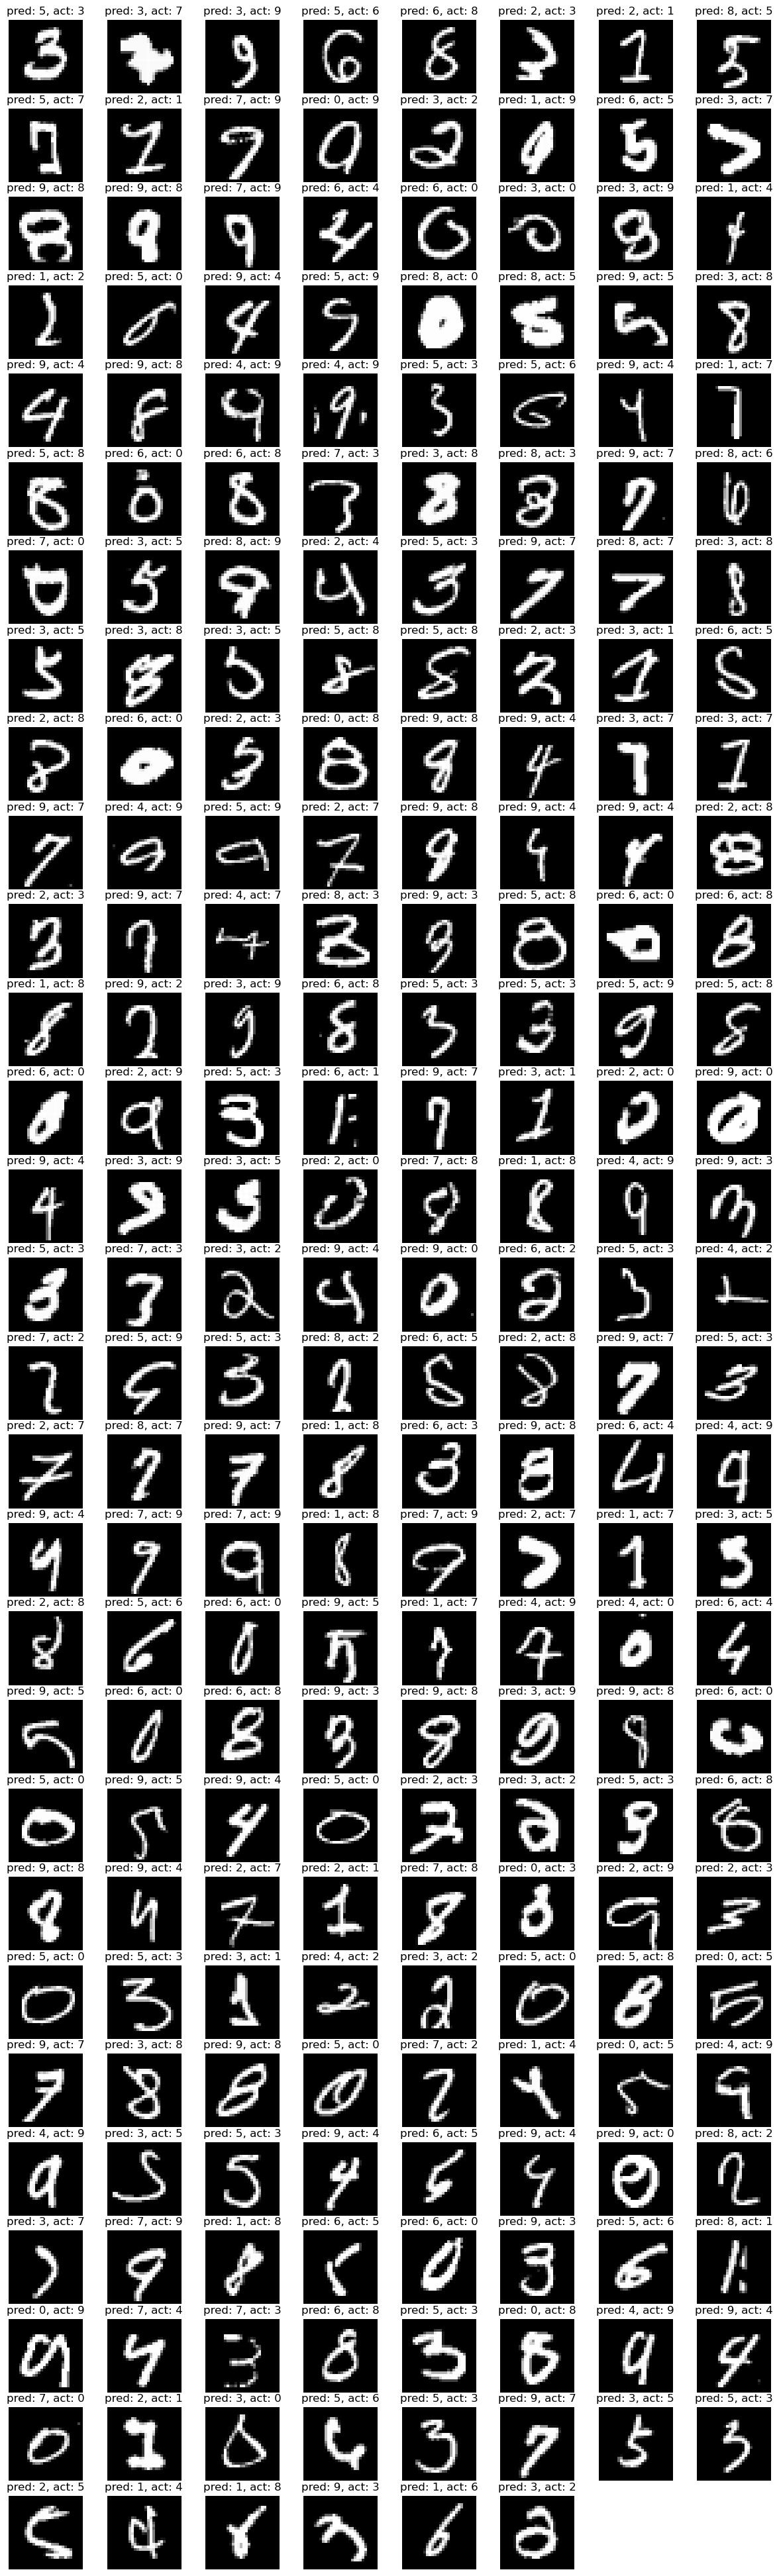

In [26]:
x = 1
plt.figure(figsize=(15, 50))
for index in mis_match_index:
    plt.subplot(height,8,x)
    plt.imshow(X_3d[index], interpolation="nearest")
    plt.gray()
    plt.axis(False)
    pred = mis_match[mis_match["df_index"] == index]["Y Predict"].values[0]
    act = mis_match[mis_match["df_index"] == index]["Y Test"].values[0]
    plt.title(f'pred: {pred}, act: {act}')
    x=x+1

### Submission

In [27]:
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [28]:
y_final = np.argmax(model.predict(minmax.transform(df_test)), axis=1)

875/875 [==============================] - 1s 2ms/step


In [29]:
pred_df = pd.DataFrame({"ImageId":df_test.index+1, "Label":y_final})
pred_df.to_csv('submission.csv',index= False)

In [30]:
pred_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
